# Q. Forecasting Airlines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Airline = pd.read_excel('Airlines+Data.xlsx')
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
Airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
Airline.shape

(96, 2)

In [6]:
Airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
Airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

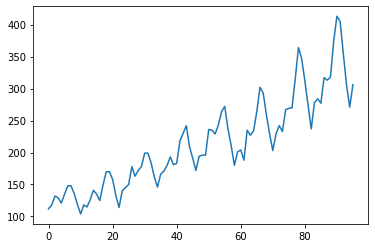

In [8]:
Airline.Passengers.plot()

<AxesSubplot:xlabel='Passengers'>

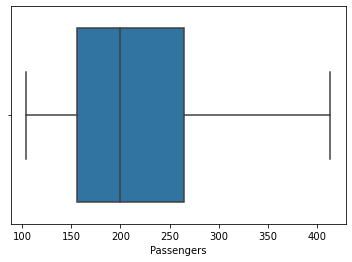

In [9]:
sns.boxplot(Airline.Passengers)

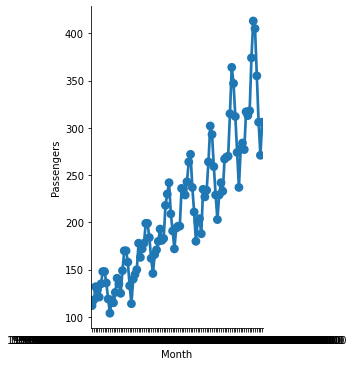

In [10]:
sns.factorplot('Month','Passengers',data=Airline)

## Moving Average

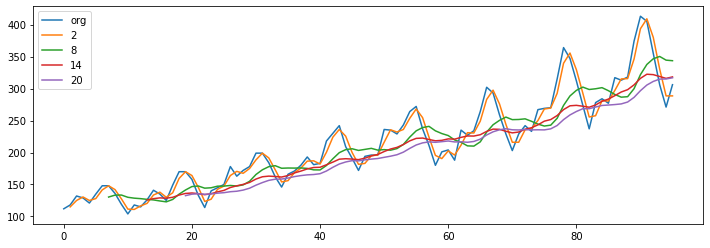

In [11]:
plt.figure(figsize=(12,4))
Airline.Passengers.plot(label="org")
for i in range(2,24,6):
    Airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

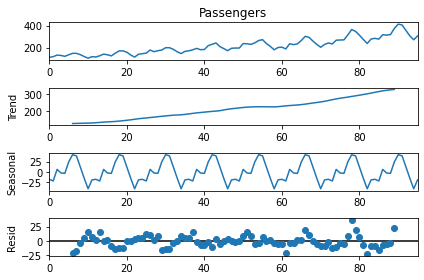

In [12]:
decompose_ts_add = seasonal_decompose(Airline.Passengers,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

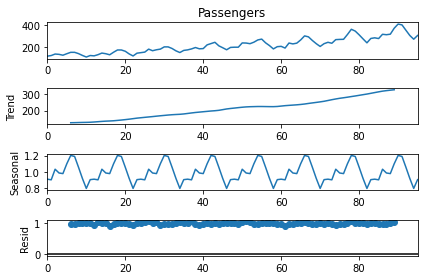

In [13]:
decompose_ts_add = seasonal_decompose(Airline.Passengers,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

## ACF and PACF plots

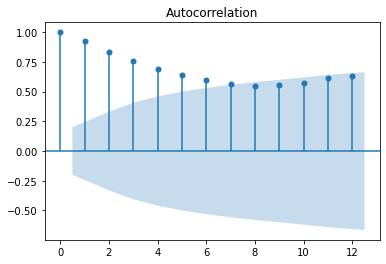

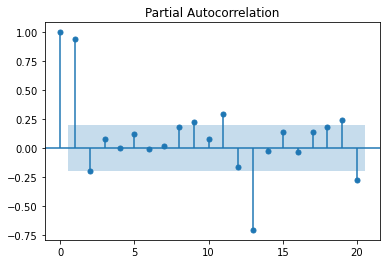

In [14]:
tsa_plots.plot_acf(Airline.Passengers,lags=12)
tsa_plots.plot_pacf(Airline.Passengers)
plt.show()

In [15]:
Train = Airline.head(70)
Test  = Airline.tail(26)

In [16]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## 1.Simple Exponential Method

In [17]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

22.07625676497336

## 2.Holt Method

In [18]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

15.417898626566

## 3.Holts winter exponential smoothing with additive seasonality and additive trend

In [19]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

10.30583769868401

## 4.Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.102725608792328

## From above 4 methods , we can see least MAPE for Holts winter exponential smmothing with additive seasonality and additive trend

In [21]:
hwe_model_add_add = ExponentialSmoothing(Airline["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

## 10 future forecast

In [22]:
hwe_model_add_add.forecast(10)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
dtype: float64

In [23]:
hwe_model_add_add.params

{'smoothing_level': 0.2546459309076082,
 'smoothing_trend': 1.0879544822539666e-12,
 'smoothing_seasonal': 0.7453540690894336,
 'damping_trend': nan,
 'initial_level': 175.88491967353048,
 'initial_trend': 2.332842193003218,
 'initial_seasons': array([-66.21629168, -60.62165819, -48.14945177, -53.42159493,
        -62.18698429, -48.08637863, -35.87300337, -38.29832579,
        -52.42782193, -71.23178275, -85.67503561, -69.07257454]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

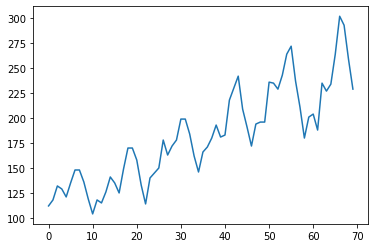

In [24]:
plt.plot(Train.index, Train["Passengers"], label='Train')

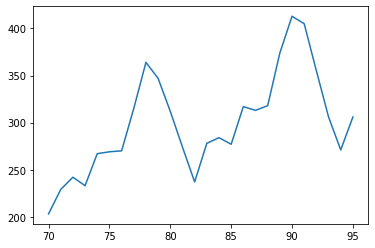

In [25]:
plt.plot(Test.index, Test["Passengers"], label='Test')

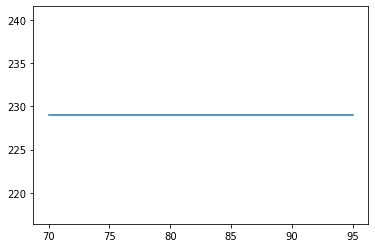

In [26]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential')

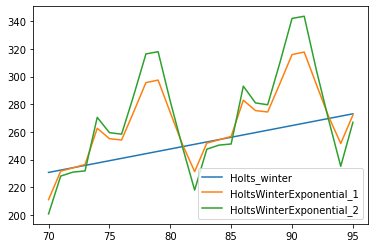

In [27]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

### Using c standred formate convert datetime to string and extract year and month

In [28]:
Airline["Date"] = pd.to_datetime(Airline["Month"],format="%b-%y")
Airline

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [29]:
Airline["month"] = Airline.Date.dt.strftime("%b") # month extraction
Airline["year"]  = Airline.Date.dt.strftime("%Y") # year extraction

In [30]:
Airline

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [31]:
t= np.arange(1,97)
Airline['t']=t
Airline['t_square']=Airline['t']*Airline['t']
log_Passengers=np.log(Airline['Passengers'])
Airline['log_Passengers']=log_Passengers

In [32]:
Airline = pd.get_dummies(Airline,columns=['month'])

In [33]:
Airline

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building | Training | Testing

In [34]:
Train = Airline.head(70)
Test  = Airline.tail(26)

## 1. Linear model

In [35]:
linear= smf.ols('Passengers~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211904

## 2. Quadratic Model

In [36]:
quad=smf.ols('Passengers~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742493

## 3. Exponential model

In [37]:
expo=smf.ols('log_Passengers~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446895

## 4.Additive seasonality

In [38]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predadd = pd.Series(additive.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828831

## 5.Additive seasonality with linear trend

In [39]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predaddlinear = pd.Series(addlinear.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.5020897942713

## 6.Additive seasonality with quadratic trend

In [40]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predaddquad = pd.Series(addquad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895924914

## 7.Multiplicative seasonality

In [41]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predmul = pd.Series(mulsea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

## 8.Multiplicative seasonality with linear trend

In [42]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predmullin = pd.Series(mullin.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predmullin))**2))
rmsemul

298.6798189957354

# 9.Multiplicative seasonality with quadratic trend

In [43]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895924914

# Compare RMSE Value

In [44]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
      'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)

In [45]:
table_rmse

,Model,Values
0,rmse_mul_quad,30.393043
1,rmseadd,124.975700
2,rmseaddlinear,34.502090
3,rmseaddquad,30.393043
4,rmseexpo,43.478471
5,rmselin,17.681880
6,rmsemul,298.679819
7,rmsemulin,298.136614
8,rmsequad,43.898145


## From above table we can see RMSE for Linear model giving less value, so that is best model.